# 03wk-1: 파이토치식 코딩패턴 (2), 로지스틱-ToyData1, 로지스틱-ToyData2

최규빈  
2025-03-19

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/03wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [8]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-yQTdybfgfAlnXsuJu2hfw1&si=ouac6dB6esRzkdT7 >}}

# 2. Imports

In [9]:
import torch
import matplotlib.pyplot as plt 

In [10]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 파이토치식 코딩패턴 (2)

*데이터*

In [89]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

## A. bias의 사용

*net에서 bias를 사용*

In [12]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=1,
    out_features=1,
    bias=True
) # net(x) = x@net.weight.T + net.bias 
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(x)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [13]:
net.bias.data, net.weight.data

`#`

## B. 잘못된(?) 코드

In [141]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [142]:
net.weight

`-` 결과시각화

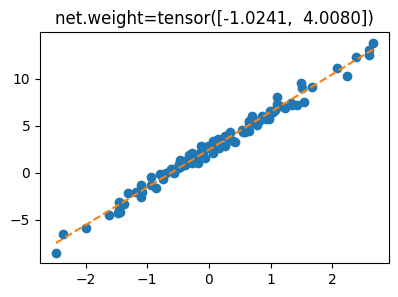

In [143]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

`-` 나쁘지 않은 이유?

In [144]:
net.weight

In [145]:
net.bias

# 4. 로지스틱 – ToyData1

## A. $\hat{\bf y} = ??$

`-` ${\bf X}$를 가지고 ${\bf y}$를 맞추는 아래와 같은 문제

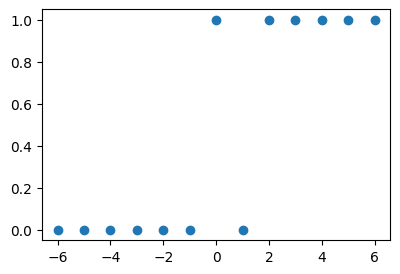

In [152]:
x = torch.tensor([-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4, 5, 6.0]).reshape(-1,1)
y = torch.tensor([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]).reshape(-1,1)
plt.plot(x,y,'o')

`-` 아래와 같이 모형화 하면?

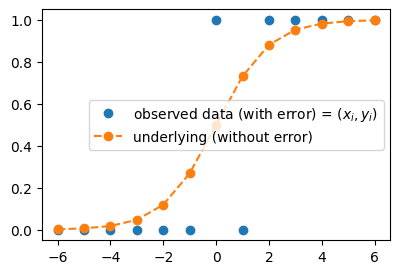

In [57]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x)/(1+torch.exp(x)),'o--', label = "underlying (without error)")
plt.legend()

## B. $\hat{\bf y} = \frac{\exp(\text{linr}({\bf X}))}{1+\exp(\text{linr}({\bf X}))}$

`-` 걱정: 산점도가 꼭 아래와 같은 방식이 아니라면 어쩌지?

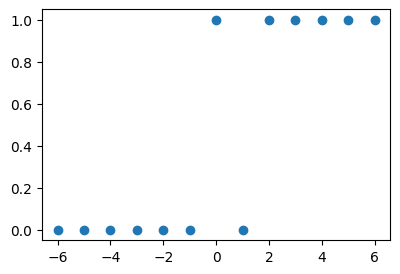

In [76]:
plt.plot(x,y,'o')

-   $x$가 증가할수록 $y$가 0이 된다면?
-   0근처에서 변화가 일어나지 않고 2근처에서 변화가 일어난다면?
-   변화가 좀 더 급하게 (혹은 완만하게 일어난다면?)

`-` 걱정해결

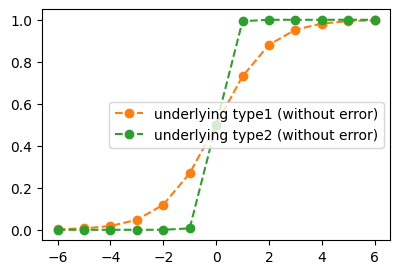

In [75]:
#plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x)/(1+torch.exp(x)),'o--', label = "underlying type1 (without error)", color="C1")
plt.plot(x,torch.exp(5*x)/(1+torch.exp(5*x)),'o--', label = "underlying type2 (without error)", color="C2")
plt.legend()

> **Note**
>
> **회귀 vs 로지스틱**
>
> -   ${\bf X} \to {\bf y}$ 에 대한 패턴이
>     $\text{linr}({\bf X}) \approx {\bf y}$ 이라면 회귀!
> -   ${\bf X} \to {\bf y}$ 에 대한 패턴이
>     $\frac{\exp(\text{linr}({\bf X}))}{1+\exp(\text{linr}({\bf X}))} \approx {\bf y}$
>     이라면 로지스틱!

# 5. 로지스틱 – ToyData2

## A. 로지스틱 모형

`-` $x$가 커질수록 $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음
\<— 외우세요!!!

-   $y_i \sim {\cal B}(\pi_i),\quad$ where
    $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)} = \frac{1}{1+\exp(-w_0-w_1x_i)}$

-   $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$

`-` 회귀모형과 로지스틱 모형의 비교

-   회귀모형: $y_i \sim {\cal N}(w_0+w_1x_i, \sigma^2)$[1]
-   로지스틱:
    $y_i \sim {\cal B}\big(\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}\big)$

`-` 우리가 예측하고 싶은것

-   회귀모형: 정규분포의 평균을 예측하고 싶음. 즉 $w_0+w_1x_i$를
    예측하고 싶음. 예측값으로는 $\hat{w}_0 + \hat{w}_1x_i$를 사용!
-   로지스틱: 베르누이의 평균을 예측하고 싶음. 즉
    $\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$를 예측하고 싶음.
    예측값으로는
    $\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}$를
    사용!

## B. 데이터

[1] 원래는 이렇게 썼었지..
$y_i = w_0 + w_1x_i + \epsilon_i \quad \epsilon_i \sim {\cal N}(0,\sigma^2)$

In [25]:
x = torch.linspace(-1,1,2000).reshape(2000,1)
w0 = -1
w1 = 5
u = w0 + x*w1 # 선형변환이네?
v = torch.exp(u) / (1+torch.exp(u)) 
y = torch.bernoulli(v)

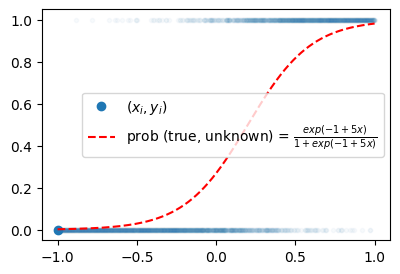

In [26]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x[0],y[0],'o',label=r"$(x_i,y_i)$",color="C0")
plt.plot(x,v,'--r',label=r"prob (true, unknown) = $\frac{exp(-1+5x)}{1+exp(-1+5x)}$")
plt.legend()

우리의 목적: $x_i$가 들어가면 빨간곡선 $\hat{y}_i$의 값을 만들어주는
mapping을 학습해보자.

## C. Step1: net 설계 (모델링)

`-` 최초의 곡선을 그려보자. ($net: x \to yhat$ 을 수행하는 네트워크를
설계해보자는 의미)

In [27]:
w0hat = -0.8
w1hat = -0.3

In [28]:
def sigmoid(x):
    return torch.exp(x)/(1+torch.exp(x))

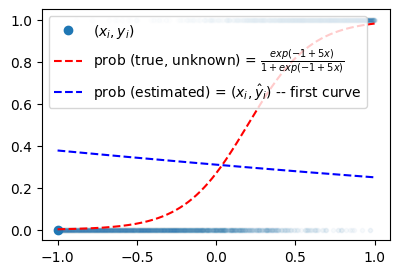

In [29]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x[0],y[0],'o',label=r"$(x_i,y_i)$",color="C0")
plt.plot(x,v,'--r',label=r"prob (true, unknown) = $\frac{exp(-1+5x)}{1+exp(-1+5x)}$")
plt.plot(x,sigmoid(w0hat + w1hat*x),'--b', label=r"prob (estimated) = $(x_i,\hat{y}_i)$ -- first curve")
plt.legend()

`-` `w0hat + w1hat*x` 이 부분을 `torch.nn.Linear(bias = False)`로 구현

In [30]:
X = torch.concat([torch.ones(2000).reshape(-1,1),x],axis=1)
l1 = torch.nn.Linear(in_features=2, out_features=1, bias = False)
l1.weight

In [31]:
l1.weight.data = torch.tensor([[-0.8,  -0.3]])

In [32]:
l1(X), w0hat + w1hat*x # 똑같죠

`-` `w0hat + w1hat*x` 이 부분을 `torch.nn.Linear(bias = True)`로 구현

In [33]:
#X = torch.concat([torch.ones(2000).reshape(-1,1),x],axis=1)
l1 = torch.nn.Linear(in_features=1, out_features=1)
l1.weight, l1.bias

In [34]:
l1.weight.data = torch.tensor([[-0.3]])
l1.bias.data = torch.tensor([-0.8])

In [35]:
l1(x), w0hat + w1hat*x # 이것도 똑같죠!

`-` 내가만든 sigmoid 대신에 토치에서 제공하는 sigmoid 사용

In [36]:
a1 = torch.nn.Sigmoid()

In [37]:
sigmoid(l1(x)), a1(l1(x)) # 똑같아요

`-` 지금까지의 구현 확인

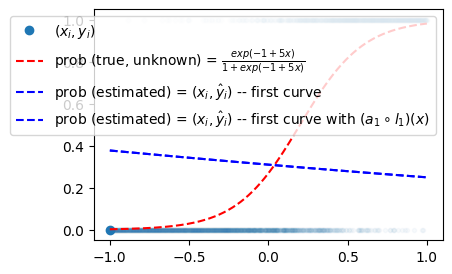

In [38]:
plt.plot(x,y,'.',alpha=0.03)
plt.plot(x[0],y[0],'o',label=r"$(x_i,y_i)$",color="C0")
plt.plot(x,v,'--r',label=r"prob (true, unknown) = $\frac{exp(-1+5x)}{1+exp(-1+5x)}$")
plt.plot(x,sigmoid(w0hat + w1hat*x),'--b', label=r"prob (estimated) = $(x_i,\hat{y}_i)$ -- first curve")
plt.plot(x,a1(l1(x)).data,'--b', label=r"prob (estimated) = $(x_i,\hat{y}_i)$ -- first curve with $(a_1 \circ l_1)(x)$")
plt.legend()

`-` 관찰: 지금 아래의 구조이다.

$${\boldsymbol x} \overset{l_1}{\to} {\boldsymbol u} \overset{a_1}{\to} {\boldsymbol v} = \hat{\boldsymbol y}$$

`-` 소망: 함수 $l_1, a_1$ 의 합성을 하나로 묶어서

$$(a_1\circ l_1)({\boldsymbol x}) := net({\boldsymbol x})$$

이러한 기능을 하는 하나의 함수 $net$을 만들 수 없을까?

In [39]:
net = torch.nn.Sequential(l1,a1) #l1을 취하고 그다음에 a1을 취하라는 의미

In [40]:
net(x), a1(l1(x)), sigmoid(w0hat+ w1hat*x)

In [47]:
_l1, _a1 = net # 언패킹!! (섭스크립터블하니까..)

In [48]:
_l1.weight, _l1.bias # 내가 설정한 웨이트도 그대로 들어가있음

## D. Step 1~4

In [49]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=1),
    torch.nn.Sigmoid()
)
l1, a1 = net # 네트워크는 섭스크립터블 오브젝트이니까..
l1.weight.data = torch.tensor([[-0.3]])
l1.bias.data = torch.tensor([-0.8])
optimizr = torch.optim.SGD(net.parameters(),lr=0.25)
#---#
for epoc in range(100):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = torch.mean((y-yhat)**2)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

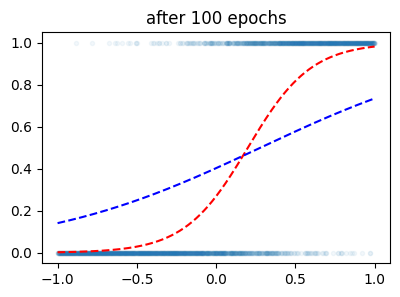

In [50]:
plt.plot(x,y,'.',alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,yhat.data,'--b')
plt.title('after 100 epochs')

In [51]:
for epoc in range(4900):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = torch.mean((y-yhat)**2)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

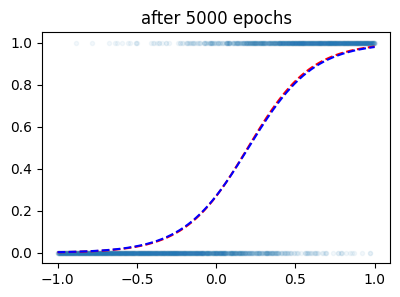

In [52]:
plt.plot(x,y,'.',alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,yhat.data,'--b')
plt.title('after 5000 epochs')

성공했나?